# Importing the required module

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Loading the dataset

In [ ]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Printing the length of the dataset

In [ ]:
print(f'Number of training samples: {len(train_dataset)}')
print(f'Number of testing samples: {len(test_dataset)}')

Number of training samples: 60000
Number of testing samples: 10000


# Display sample imagaes for both datasets

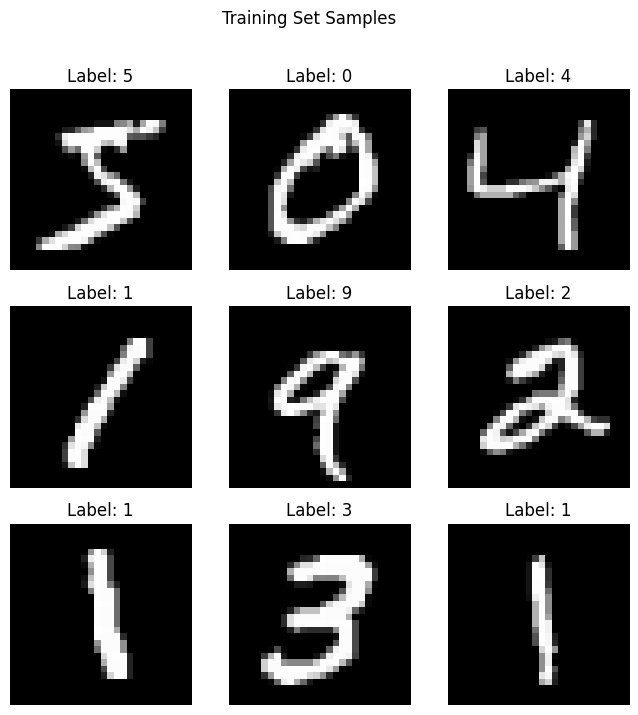

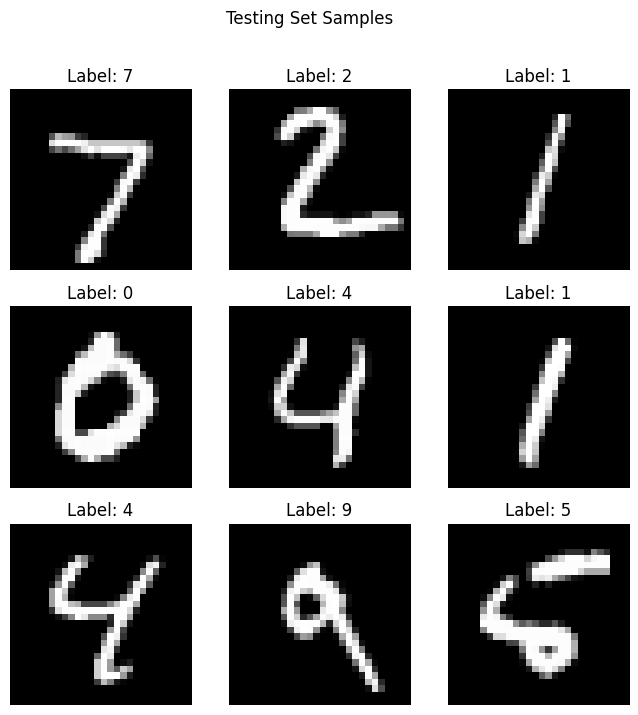

In [ ]:
def show_samples(dataset, title):
    plt.figure(figsize=(8,8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        image, label = dataset[i]
        image = image.squeeze()
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_samples(train_dataset, 'Training Set Samples')
show_samples(test_dataset, 'Testing Set Samples')



# Load dataset in loaders



In [ ]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Building a basic model with nn module

In [ ]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim)  # First hidden layer
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)  # Second hidden layer
        self.fc3 = torch.nn.Linear(hidden_dim, output_dim)  # Output layer
    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation after first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation after second hidden layer
        outputs = self.fc3(x)    # Output layer (logits)
        return outputs
input_dim = 784  # 28x28
hidden_dim = 128  # Number of neurons in the hidden layer
output_dim = 10  # Digits 0-9
model = NeuralNetwork(input_dim, hidden_dim, output_dim)

# Printing loss and accuracy for epoch

In [ ]:
 criterion = torch.nn.CrossEntropyLoss()
 optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
 epochs = 50
 for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Flatten the images
        images = images.view(-1, 28 * 28)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()
    # Calculate accuracy on the training set after each epoch
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation during inference
        for images, labels in train_loader:
            images = images.view(-1, 28 * 28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    model.train()  # Set the model back to training mode
    # Print the loss and accuracy for each epoch
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

Epoch [1/50], Loss: 2.2904, Accuracy: 14.40%
Epoch [2/50], Loss: 2.2594, Accuracy: 34.14%
Epoch [3/50], Loss: 2.2356, Accuracy: 50.52%
Epoch [4/50], Loss: 2.1862, Accuracy: 56.33%
Epoch [5/50], Loss: 2.1131, Accuracy: 59.37%
Epoch [6/50], Loss: 2.0139, Accuracy: 61.87%
Epoch [7/50], Loss: 1.9283, Accuracy: 64.60%
Epoch [8/50], Loss: 1.7168, Accuracy: 67.47%
Epoch [9/50], Loss: 1.5902, Accuracy: 69.92%
Epoch [10/50], Loss: 1.3194, Accuracy: 71.90%
Epoch [11/50], Loss: 1.1916, Accuracy: 74.02%
Epoch [12/50], Loss: 1.0126, Accuracy: 76.39%
Epoch [13/50], Loss: 1.0209, Accuracy: 78.03%
Epoch [14/50], Loss: 0.7669, Accuracy: 79.45%
Epoch [15/50], Loss: 0.8097, Accuracy: 80.50%
Epoch [16/50], Loss: 0.7579, Accuracy: 81.55%
Epoch [17/50], Loss: 0.6463, Accuracy: 82.38%
Epoch [18/50], Loss: 0.6374, Accuracy: 83.09%
Epoch [19/50], Loss: 0.4909, Accuracy: 83.68%
Epoch [20/50], Loss: 0.6205, Accuracy: 84.22%
Epoch [21/50], Loss: 0.6107, Accuracy: 84.68%
Epoch [22/50], Loss: 0.5996, Accuracy: 85.2